**Kelompok 2**

Rio Wardhana Nasution (5311522113)

Christofel Natanael Butar Butar (5311422114)

Mohamad Iqbal Algifari (5311422116)

DAVID Gunawan (5311422117)

Adian Rahmat (5311422119)

In [ ]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

# To install sklearn type "pip install numpy scipy scikit-learn" to the anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

# Datetime lib
from pandas import to_datetime
import itertools
import warnings
import datetime
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

# pip install graphviz
# conda install python-graphviz
from sklearn.tree import export_graphviz

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
crm = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/crm1.csv')
#crm dataset column and rows
shape = crm.shape[0], crm.shape[1]

rev = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/device1.csv')
#rev (revneue) dataset column and rows
shape = rev.shape[0], rev.shape[1]

device = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/rev1.csv')
#device dataset column and rows
shape = device.shape[0], device.shape[1]

In [ ]:
#Non-cleaned dataframes merged
merged = pd.merge(pd.merge(crm, device, on='msisdn'),rev,on='msisdn')

In [ ]:
#Datatype of the columns in the dataframe
display(merged.dtypes)

msisdn            object
gender            object
year_of_birth    float64
system_status     object
mobile_type       object
value_segment     object
week_number        int64
revenue_usd      float64
imei_tac          object
brand_name        object
model_name        object
os_name           object
os_vendor         object
dtype: object

In [ ]:
#Non-cleaned dataframes merged
merged = pd.merge(pd.merge(crm, device, on='msisdn'),rev,on='msisdn')

In [ ]:
#Dropping rows with null values

merged = merged.dropna()
merged

#Checking if there are null values
merged.isnull().sum()

msisdn           0
gender           0
year_of_birth    0
system_status    0
mobile_type      0
value_segment    0
week_number      0
revenue_usd      0
imei_tac         0
brand_name       0
model_name       0
os_name          0
os_vendor        0
dtype: int64

In [ ]:
# Unique genders across merge
merged.get('gender').unique()

array(['Male', 'Female', 'MALE', 'FEMALE', 'M'], dtype=object)

In [ ]:
# Function to converge genders, then convert to integers (Male- 0, Female- 1)

def new_gender_status(gender):
    if gender == 'Male':
        return 0
    elif gender == 'MALE':
        return 0
    elif gender ==  'M':
        return 0
    elif gender == 'Female':
        return 1
    elif gender == 'FEMALE':
        return 1

merged= merged.assign(genders= merged.get('gender').apply(new_gender_status))#assigning new column to name genders
merged= merged.drop(columns= ['gender']) #drop old gender category
merged.get('genders').unique()
merged

,msisdn,year_of_birth,system_status,mobile_type,value_segment,week_number,revenue_usd,imei_tac,brand_name,model_name,os_name,os_vendor,genders
0,4f5216988c44ec0a96a82a04f28b49fa,1988.0,ACTIVE,Prepaid,Tier_3,34,8.388883,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,0
1,4f5216988c44ec0a96a82a04f28b49fa,1988.0,ACTIVE,Prepaid,Tier_3,24,4.570665,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,0
2,4f5216988c44ec0a96a82a04f28b49fa,1988.0,ACTIVE,Prepaid,Tier_3,30,19.584760,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,0
3,4f5216988c44ec0a96a82a04f28b49fa,1988.0,ACTIVE,Prepaid,Tier_3,31,9.272223,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,0
4,4f5216988c44ec0a96a82a04f28b49fa,1988.0,ACTIVE,Prepaid,Tier_3,33,13.292059,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213228,07cba7c6dd43e14dbbace9bb36d1f3a8,1952.0,ACTIVE,Prepaid,Tier_3,23,20.038510,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,0
213229,07cba7c6dd43e14dbbace9bb36d1f3a8,1952.0,ACTIVE,Prepaid,Tier_3,25,11.958916,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,0
213230,07cba7c6dd43e14dbbace9bb36d1f3a8,1952.0,ACTIVE,Prepaid,Tier_3,29,10.229510,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,0
213231,07cba7c6dd43e14dbbace9bb36d1f3a8,1952.0,ACTIVE,Prepaid,Tier_3,28,10.108985,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,0


In [ ]:
#Column is currently float64, convert to integer

# chronological array of unique year of birth
birth_years = merged.groupby('year_of_birth').count().reset_index().get('year_of_birth').unique()
birth_years = birth_years.astype(int) #int() and np.int() did not work
birth_years #it doesn't allow me to use it in a function

# assigning a new column: birth_year- rather than year_of_birth
merged= merged.assign(birth_year= merged.get('year_of_birth').astype(int))
merged = merged.drop(columns= ['year_of_birth'])
merged

,msisdn,system_status,mobile_type,value_segment,week_number,revenue_usd,imei_tac,brand_name,model_name,os_name,os_vendor,genders,birth_year
0,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Prepaid,Tier_3,34,8.388883,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,0,1988
1,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Prepaid,Tier_3,24,4.570665,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,0,1988
2,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Prepaid,Tier_3,30,19.584760,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,0,1988
3,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Prepaid,Tier_3,31,9.272223,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,0,1988
4,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Prepaid,Tier_3,33,13.292059,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,0,1988
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213228,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Prepaid,Tier_3,23,20.038510,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,0,1952
213229,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Prepaid,Tier_3,25,11.958916,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,0,1952
213230,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Prepaid,Tier_3,29,10.229510,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,0,1952
213231,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Prepaid,Tier_3,28,10.108985,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,0,1952


In [ ]:
merged.get('mobile_type').unique()

array(['Prepaid', 'Postpaid'], dtype=object)

In [ ]:
#Function that assigns 0 to mobile_type value is 'Postpaid' and 1 to 'Prepaid'
def mobile_type(type):
    if type == 'Postpaid':
        return 0
    elif type == 'Prepaid':
        return 1

merged = merged.assign(paid_status= merged.get('mobile_type').apply(mobile_type))
merged = merged.drop(columns= ['mobile_type'])
merged

,msisdn,system_status,value_segment,week_number,revenue_usd,imei_tac,brand_name,model_name,os_name,os_vendor,genders,birth_year,paid_status
0,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,34,8.388883,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,0,1988,1
1,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,24,4.570665,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,0,1988,1
2,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,30,19.584760,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,0,1988,1
3,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,31,9.272223,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,0,1988,1
4,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,33,13.292059,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,0,1988,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213228,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,23,20.038510,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,0,1952,1
213229,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,25,11.958916,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,0,1952,1
213230,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,29,10.229510,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,0,1952,1
213231,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,28,10.108985,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,0,1952,1


In [ ]:
#Converting revenue from float to integer
merged = merged.assign(revenue= merged.get('revenue_usd').astype(int))
merged = merged.drop(columns= ['revenue_usd'])
merged

,msisdn,system_status,value_segment,week_number,imei_tac,brand_name,model_name,os_name,os_vendor,genders,birth_year,paid_status,revenue
0,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,34,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,0,1988,1,8
1,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,24,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,0,1988,1,4
2,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,30,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,0,1988,1,19
3,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,31,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,0,1988,1,9
4,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,33,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,0,1988,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213228,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,23,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,0,1952,1,20
213229,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,25,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,0,1952,1,11
213230,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,29,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,0,1952,1,10
213231,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,28,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,0,1952,1,10


In [ ]:
#Function take year and converts into decade
def decade_to_year(year):
    divide_year = year/10
    int_year = int(divide_year)
    multiply = int_year*10
    return multiply

merged= merged.assign(decade= merged.get('birth_year').apply(decade_to_year))
merged

,msisdn,system_status,value_segment,week_number,imei_tac,brand_name,model_name,os_name,os_vendor,genders,birth_year,paid_status,revenue,decade
0,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,34,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,0,1988,1,8,1980
1,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,24,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,0,1988,1,4,1980
2,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,30,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,0,1988,1,19,1980
3,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,31,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,0,1988,1,9,1980
4,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,33,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,0,1988,1,13,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213228,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,23,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,0,1952,1,20,1950
213229,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,25,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,0,1952,1,11,1950
213230,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,29,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,0,1952,1,10,1950
213231,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,28,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,0,1952,1,10,1950


In [ ]:
# Need to run this first, to get 15 columns
merged = merged.assign(age= 2022-merged.get('birth_year').astype(int))
merged

,msisdn,system_status,value_segment,week_number,imei_tac,brand_name,model_name,os_name,os_vendor,genders,birth_year,paid_status,revenue,decade,age
0,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,34,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,0,1988,1,8,1980,34
1,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,24,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,0,1988,1,4,1980,34
2,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,30,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,0,1988,1,19,1980,34
3,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,31,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,0,1988,1,9,1980,34
4,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,33,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,0,1988,1,13,1980,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213228,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,23,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,0,1952,1,20,1950,70
213229,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,25,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,0,1952,1,11,1950,70
213230,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,29,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,0,1952,1,10,1950,70
213231,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,28,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,0,1952,1,10,1950,70


In [ ]:
merged_cleaned= merged.drop(columns= ['msisdn','value_segment',  'imei_tac', 'brand_name', 'model_name', 'os_name', 'os_vendor'])
merged_cleaned

,system_status,week_number,genders,birth_year,paid_status,revenue,decade,age
0,ACTIVE,34,0,1988,1,8,1980,34
1,ACTIVE,24,0,1988,1,4,1980,34
2,ACTIVE,30,0,1988,1,19,1980,34
3,ACTIVE,31,0,1988,1,9,1980,34
4,ACTIVE,33,0,1988,1,13,1980,34
...,...,...,...,...,...,...,...,...
213228,ACTIVE,23,0,1952,1,20,1950,70
213229,ACTIVE,25,0,1952,1,11,1950,70
213230,ACTIVE,29,0,1952,1,10,1950,70
213231,ACTIVE,28,0,1952,1,10,1950,70


In [ ]:
for column in merged_cleaned:
    unique_vals = np.unique(merged_cleaned[column])
    nr_values = len(unique_vals)
    print('The number of values for feature {} :{} -- {}'.format(column, nr_values, unique_vals))

The number of values for feature system_status :2 -- ['ACTIVE' 'SUSPEND']
The number of values for feature week_number :14 -- [22 23 24 25 26 27 28 29 30 31 32 33 34 35]
The number of values for feature genders :2 -- [0 1]
The number of values for feature birth_year :73 -- [1919 1920 1924 1927 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941
 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955
 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969
 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983
 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997
 1998 1999 2000]
The number of values for feature paid_status :2 -- [0 1]
The number of values for feature revenue :45 -- [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 44 57 66 82]
The number of values for feature decade :10 -- [1910 1920 1930 1940 1950 1960 1970 1980 1990 2000]
The number o

Proportion Data

In [ ]:
#Number of SUSPEND users
merged_cleaned[merged_cleaned.get('system_status')=='SUSPEND'].count()

#Proportion of ACTIVE users
merged_cleaned[merged_cleaned.get('system_status')=='ACTIVE'].count()/merged_cleaned.get('system_status').count()

system_status    0.979428
week_number      0.979428
genders          0.979428
birth_year       0.979428
paid_status      0.979428
revenue          0.979428
decade           0.979428
age              0.979428
dtype: float64

In [ ]:
all_df_men = merged_cleaned[merged_cleaned.get('genders')==0]
#107590 male customers

all_df_female = merged_cleaned[merged_cleaned.get('genders')==1]
#16560 female customers

In [ ]:
all_gender_female_proportion= len(all_df_female)/len(merged_cleaned)
all_gender_male_proportion= 1- all_gender_female_proportion
np.round(all_gender_male_proportion, decimals=3), np.round(all_gender_female_proportion, decimals= 3)
print('The proportion of male is {} and the proportion of female is {}'.format(all_gender_male_proportion, all_gender_female_proportion))

The proportion of male is 0.8666129681836487 and the proportion of female is 0.1333870318163512


In [ ]:
active_df= merged_cleaned
active_df = active_df[active_df.get('system_status')=='ACTIVE']
#121596 customers

In [ ]:
active_df_male = active_df[active_df.get('genders')==0]
active_df_female = active_df[active_df.get('genders')==1]

In [ ]:
active_gender_female_proportion= len(active_df_female)/len(active_df)
active_gender_male_proportion= 1- active_gender_female_proportion
np.round(active_gender_male_proportion, decimals=3), np.round(active_gender_female_proportion, decimals= 3)
print('The proportion of male is {} and the proportion of female is {}'.format(active_gender_female_proportion, active_gender_male_proportion))

The proportion of male is 0.1342149412809632 and the proportion of female is 0.8657850587190368


In [ ]:
suspend_df = merged_cleaned
suspend_df = merged_cleaned[merged_cleaned.get('system_status')=='SUSPEND']

#2554 rows/ex-customers

In [ ]:
suspend_df_men = suspend_df[suspend_df.get('genders')==0] #2314
suspend_df_female = suspend_df[suspend_df.get('genders')==1] #240

In [ ]:
suspend_gender_female_proportion= len(suspend_df_female)/len(suspend_df)
suspend_gender_male_proportion= 1- suspend_gender_female_proportion
np.round(suspend_gender_male_proportion, decimals=3), np.round(suspend_gender_female_proportion, decimals= 3)
print('The proportion of male is {} and the proportion of female is {}'.format(suspend_gender_female_proportion, suspend_gender_male_proportion))

The proportion of male is 0.09397024275646046 and the proportion of female is 0.9060297572435395


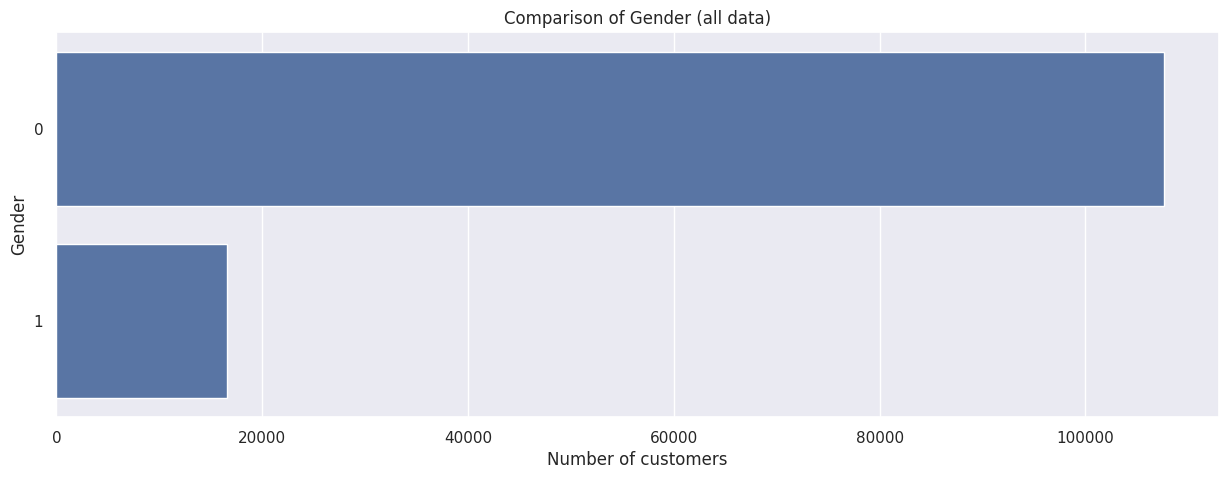

In [ ]:
#all- gender
all_gender= plt.figure(figsize=(15,5))
sns.countplot(y='genders', data=merged_cleaned)
sns.set_style('whitegrid')
plt.title('Comparison of Gender (all data)')
plt.xlabel('Number of customers')
plt.ylabel('Gender')

plt.savefig("all_gender.png")

plt.show()


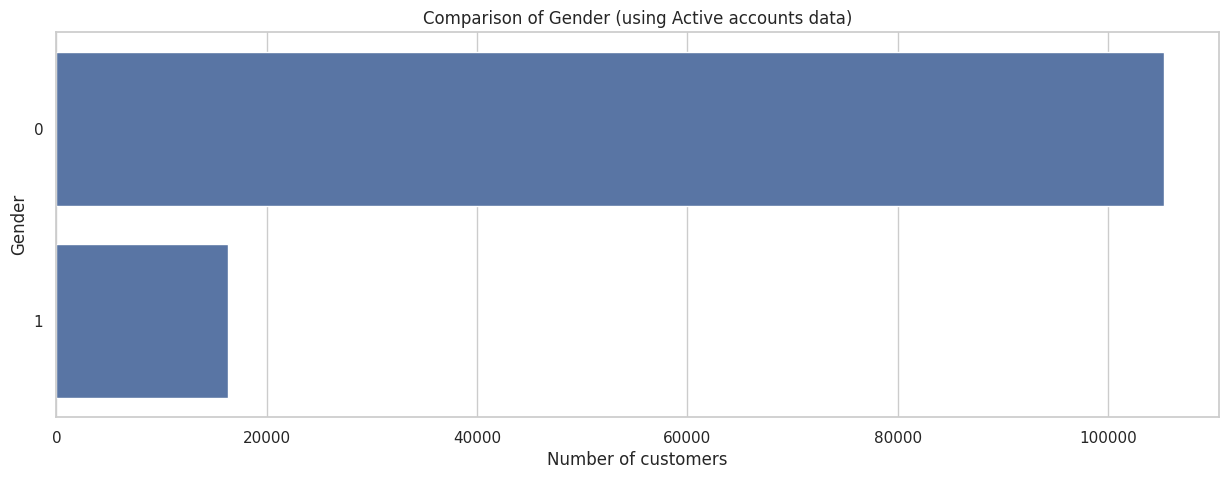

In [ ]:
#active- gender
active_gender= plt.figure(figsize=(15,5))
sns.countplot(y='genders', data= active_df)
sns.set_style('whitegrid')
plt.title('Comparison of Gender (using Active accounts data)')
plt.xlabel('Number of customers')
plt.ylabel('Gender')
plt.savefig("active_gender.png")

plt.show()

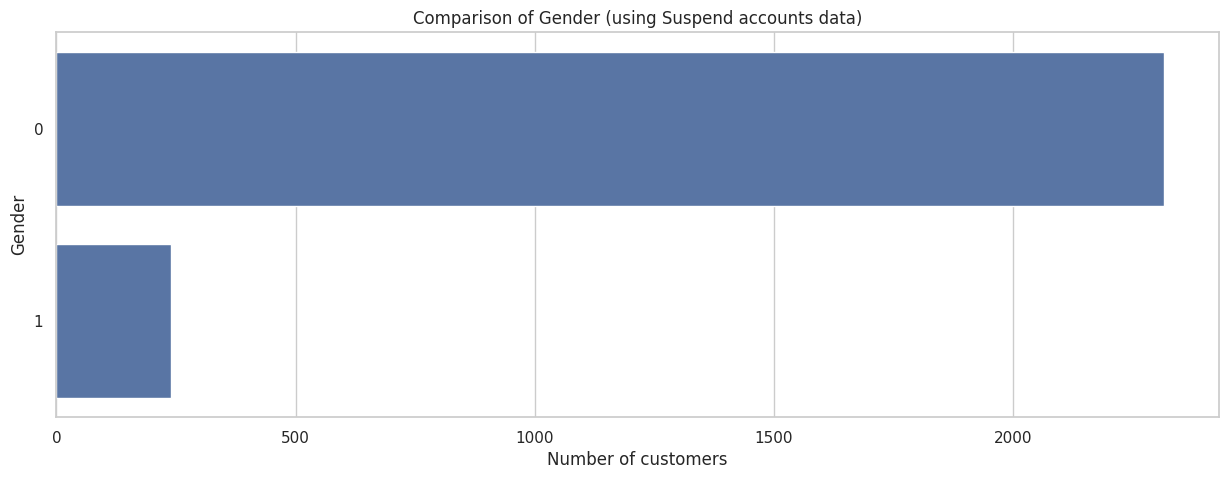

In [ ]:
#suspend- gender
suspend_gender= plt.figure(figsize=(15,5))
sns.countplot(y='genders', data= suspend_df)

sns.set_style('whitegrid')

plt.title('Comparison of Gender (using Suspend accounts data)')
plt.xlabel('Number of customers')
plt.ylabel('Gender')

plt.savefig("suspend_gender.png")

plt.show()

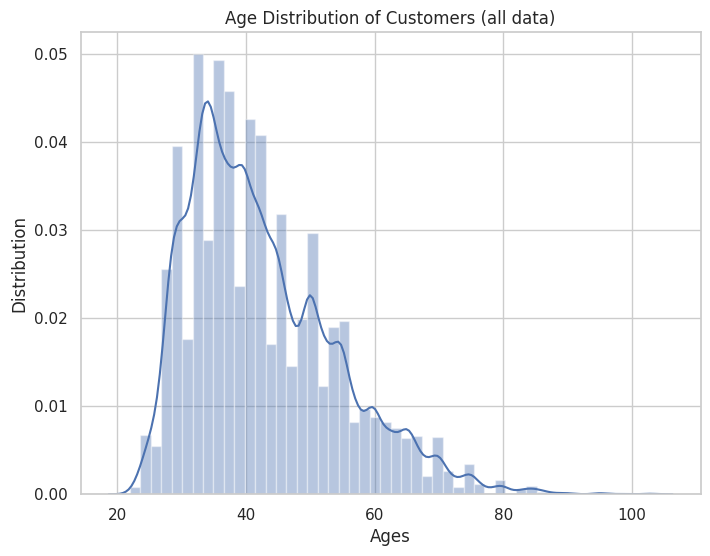

In [ ]:
#age- all
all_age= sns.distplot(merged_cleaned['age'])

plt.title('Age Distribution of Customers (all data)')
plt.xlabel('Ages')
plt.ylabel('Distribution')

plt.savefig("age_all.png")

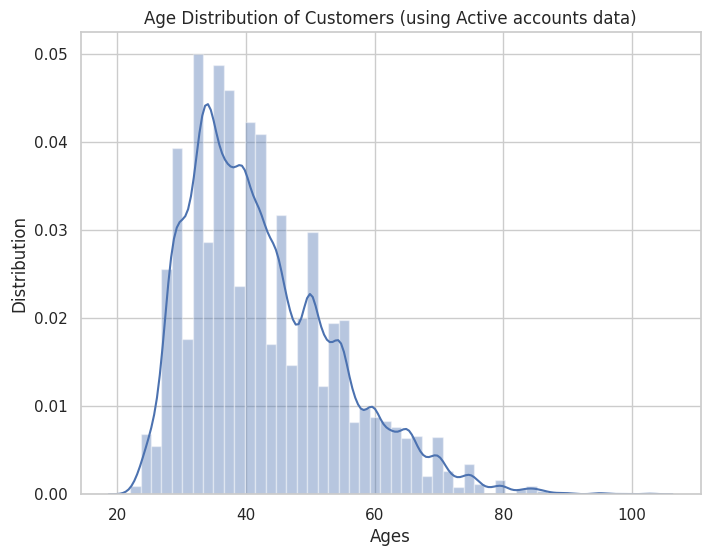

In [ ]:
#age- active
all_age= sns.distplot(active_df['age'])

plt.title('Age Distribution of Customers (using Active accounts data)')
plt.xlabel('Ages')
plt.ylabel('Distribution')

plt.savefig("age_active.png")

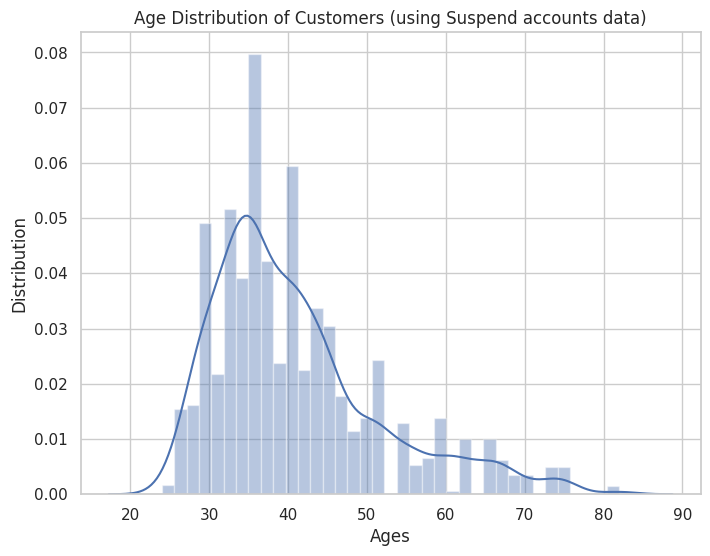

In [ ]:
#age- suspend
all_age= sns.distplot(suspend_df['age'])

plt.title('Age Distribution of Customers (using Suspend accounts data)')
plt.xlabel('Ages')
plt.ylabel('Distribution')

plt.savefig("age_suspend.png")

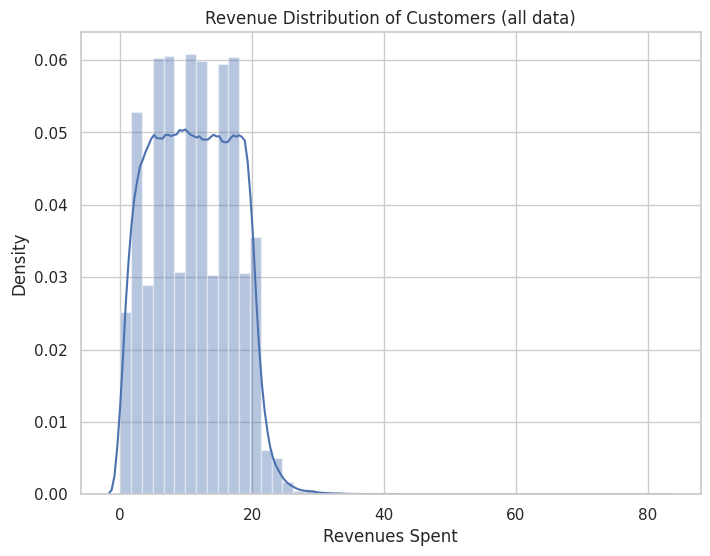

In [ ]:
#all- revenue
all_rev = sns.distplot(merged_cleaned['revenue'])

plt.title('Revenue Distribution of Customers (all data)')
plt.xlabel('Revenues Spent')
plt.ylabel('Density')

plt.savefig("all_rev.png")

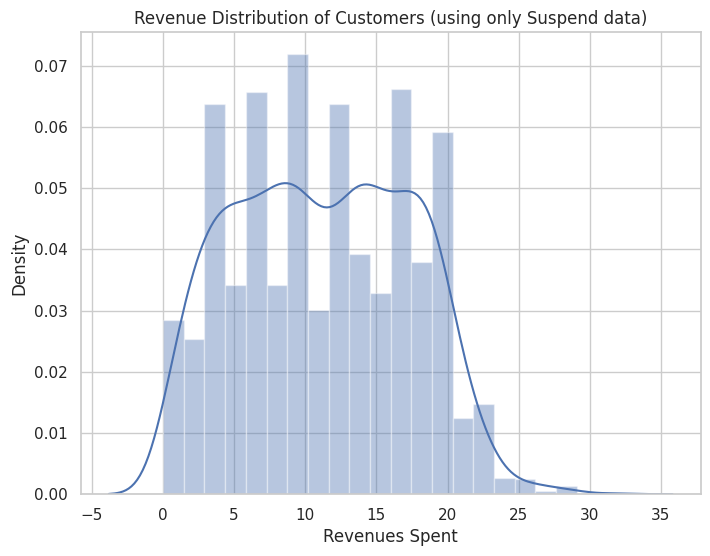

In [ ]:
#suspend- revenue
all_rev = sns.distplot(suspend_df['revenue'])

plt.title('Revenue Distribution of Customers (using only Suspend data)')
plt.xlabel('Revenues Spent')
plt.ylabel('Density')

plt.savefig("suspend_rev.png")

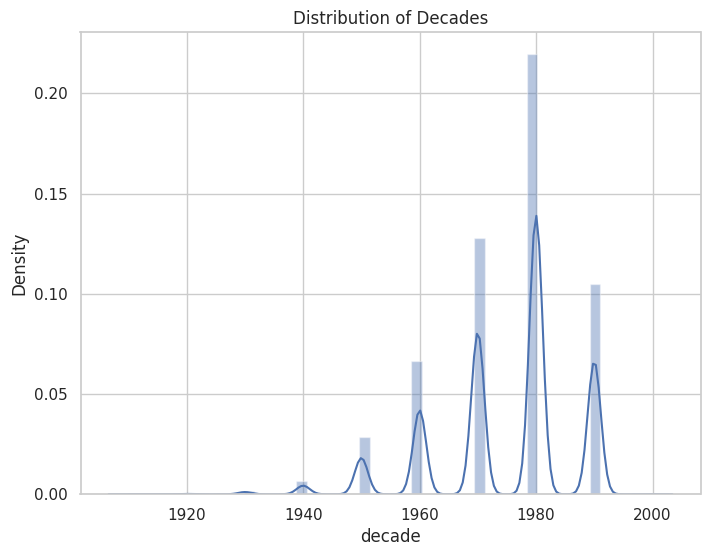

In [ ]:
sns.distplot(merged_cleaned['decade'])
plt.title('Distribution of Decades')
plt.savefig('Basic_decade.png')

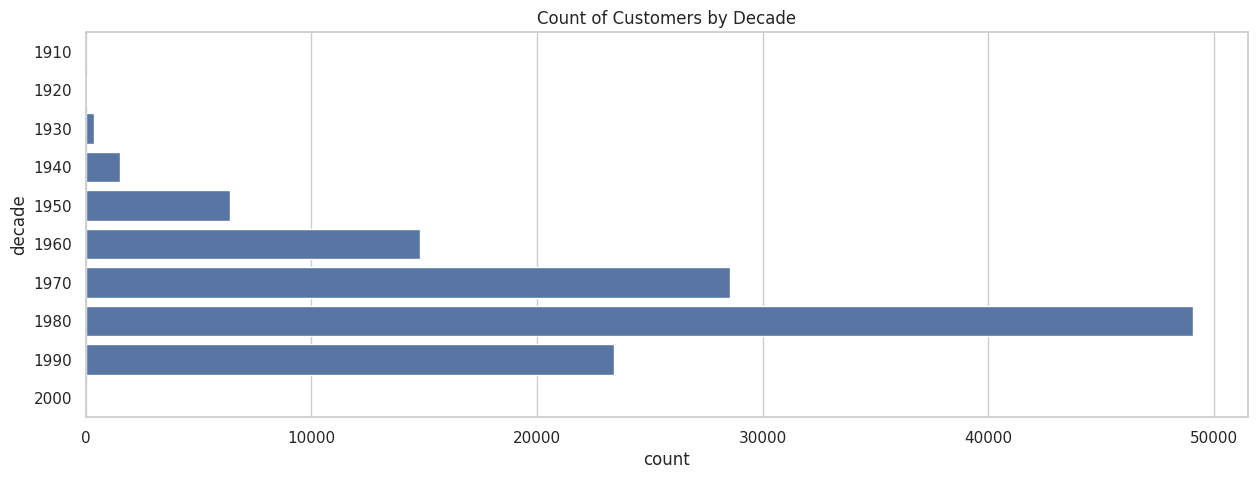

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(y='decade', data= merged_cleaned)
plt.title('Count of Customers by Decade')
plt.savefig("Basic_decades_p2.png")
plt.show()

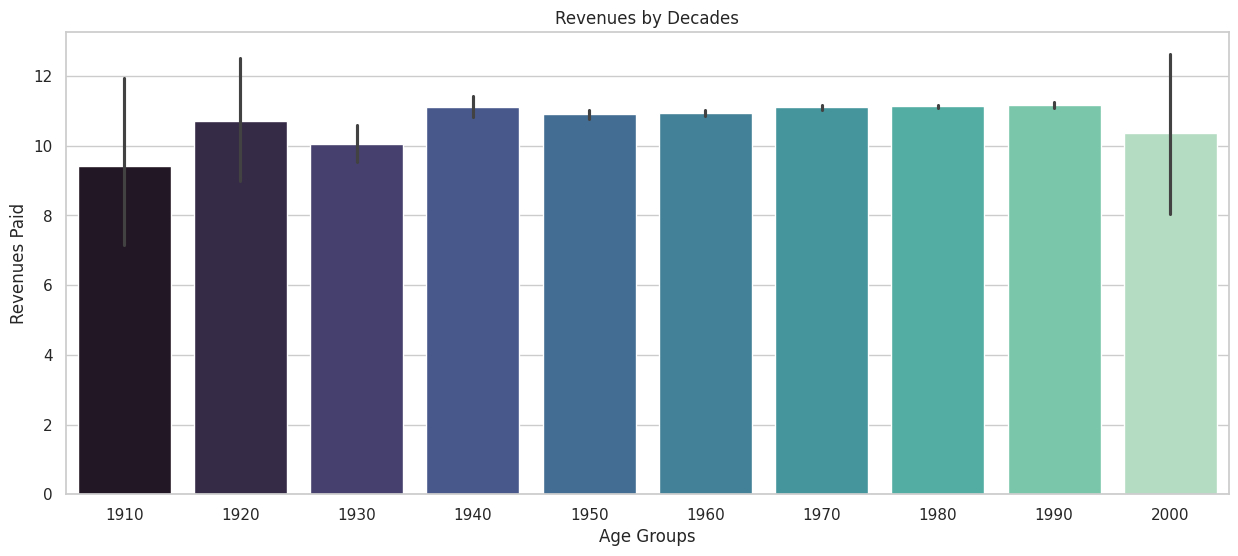

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x=merged_cleaned.get('decade'), y=merged_cleaned.get('revenue'), palette= 'mako')
plt.title('Revenues by Decades')
plt.xlabel('Age Groups')
plt.ylabel('Revenues Paid')

plt.savefig("all_revenue_by_decade.png")

plt.show()

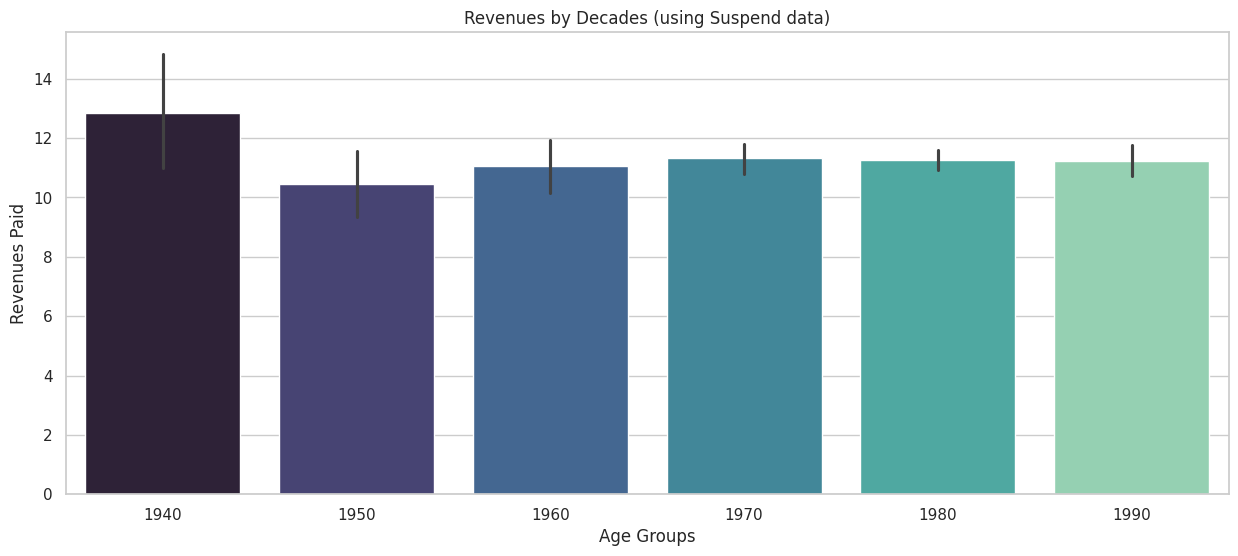

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x=suspend_df.get('decade'), y=suspend_df.get('revenue'), palette= 'mako')
plt.title('Revenues by Decades (using Suspend data)')
plt.xlabel('Age Groups')
plt.ylabel('Revenues Paid')

plt.savefig("suspend_revenue_by_decade.png.png")

plt.show()

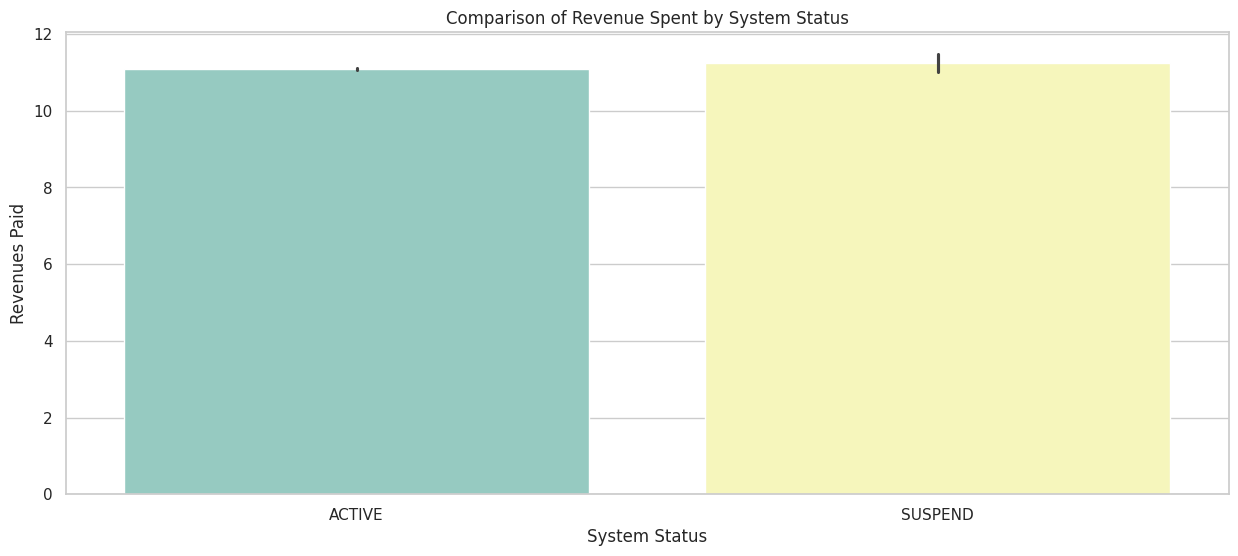

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x=merged_cleaned.get('system_status'), y=merged_cleaned.get('revenue'), palette= 'Set3')
plt.title('Comparison of Revenue Spent by System Status')
plt.xlabel('System Status')
plt.ylabel('Revenues Paid')

plt.savefig("comparison_of_revenue_by_system_status.png")

plt.show()

In [ ]:
round(merged_cleaned.describe(),2)

,week_number,genders,birth_year,paid_status,revenue,decade,age
count,124150.00,124150.00,124150.00,124150.00,124150.00,124150.00,124150.00
mean,28.77,0.13,1979.50,0.99,11.09,1974.99,42.50
std,4.05,0.34,11.48,0.09,6.06,11.84,11.48
min,22.00,0.00,1919.00,0.00,0.00,1910.00,22.00
25%,25.00,0.00,1972.00,1.00,6.00,1970.00,34.00
50%,29.00,0.00,1982.00,1.00,11.00,1980.00,40.00
75%,32.00,0.00,1988.00,1.00,16.00,1980.00,50.00
max,35.00,1.00,2000.00,1.00,82.00,2000.00,103.00


In [ ]:
#Testing on system_status
X = merged_cleaned.drop('system_status', axis=1).values# Input features (attributes)
y = merged_cleaned['system_status'].values # Target vector
print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

# using a 80-train/20-test ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=0)

X shape: (124150, 7)
y shape: (124150,)


**Metode SVM RBF Kernel**

In [ ]:
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC()


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9790


In [ ]:
# instantiate classifier with rbf kernel and C=1
rbf_svc=SVC(C=1.0)


# fit classifier to training set
rbf_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=rbf_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1.0 : 0.9790


In [ ]:
# instantiate classifier with rbf kernel and C=100
rbf_svc=SVC(C=100.0)


# fit classifier to training set
rbf_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=rbf_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9790


In [ ]:
# instantiate classifier with rbf kernel and C=500
rbf_svc=SVC(C=500.0)


# fit classifier to training set
rbf_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=rbf_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=500.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=500.0 : 0.9790


In [ ]:
y_pred_train = rbf_svc.predict(X_train)

y_pred_train

array(['ACTIVE', 'ACTIVE', 'ACTIVE', ..., 'ACTIVE', 'ACTIVE', 'ACTIVE'],
      dtype=object)

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(rbf_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(rbf_svc.score(X_test, y_test)))

Training set score: 0.9795
Test set score: 0.9790


In [ ]:
# Konversi array numpy menjadi objek Series pandas
y_test_pred = pd.Series(y_test)

# Hitung jumlah kemunculan setiap nilai
class_distribution = y_test_pred.value_counts()

# Tampilkan distribusi kelas
print(class_distribution)


ACTIVE     24308
SUSPEND      522
dtype: int64


In [ ]:
# check null accuracy score

null_accuracy = (24308/(24308+522))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.9790


In [ ]:

merged_cleaned['system_status'].value_counts()


ACTIVE     121596
SUSPEND      2554
Name: system_status, dtype: int64

**Confusion Matrix**

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[24308     0]
 [  522     0]]

True Positives(TP) =  24308

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  522


<Axes: >

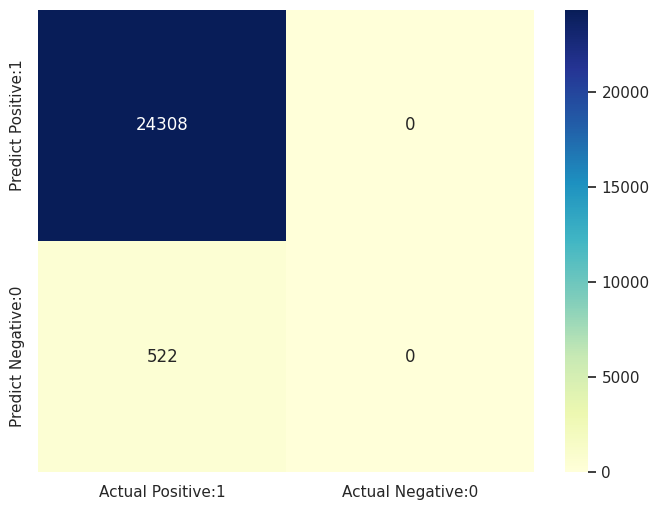

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

**Classification Performance**

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy * 100, "%")

97.89770438985099 %


**Lost Performance**

In [ ]:
#Hitung error rate
error_rate = 1 - accuracy

# Format error rate sebagai persen
error_rate_persen = error_rate * 100

# Tampilkan error rate dalam persen
print("Error Rate:", error_rate_persen,"%")

Error Rate: 2.1022956101490187 %


In [ ]:
classification_error =(FP+FN)/float(TP+TN+FP+FN)

print('Classification error :{0:0.4f}'.format(classification_error))

Classification error :0.0210


**Classification Result**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

      ACTIVE       0.98      1.00      0.99     24308
     SUSPEND       0.00      0.00      0.00       522

    accuracy                           0.98     24830
   macro avg       0.49      0.50      0.49     24830
weighted avg       0.96      0.98      0.97     24830

